In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## DATA DESCRIPTION

- Title: Name of the Netflix content .

- Available Globally: Indicates if the content is available worldwide (Yes or possibly No).

- Release Date: Date the content was released on Netflix.

- Hours Viewed: Total hours viewed.

- Language Indicator: Language of the content.

- Content Type:Type of content.

In [45]:
data=pd.read_csv('netflix_content.csv')
data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [46]:
df=data.copy()
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


## Exploratory Analysis

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


df.describe()

In [48]:
df['Release Date']=pd.to_datetime(df['Release Date'])

In [49]:
df['Hours Viewed']=df['Hours Viewed'].replace(',','',regex=True).astype(float)

In [50]:
df[df['Release Date'].isnull()]

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
34,"Pablo Escobar, el patrón del mal: Season 1",Yes,NaT,170100000.0,Non-English,Show
37,Chiquititas (2013),No,NaT,162000000.0,English,Movie
42,New Amsterdam (2018): Season 1,No,NaT,153000000.0,English,Show
44,Mr. Queen // 철인왕후,No,NaT,151500000.0,Korean,Movie
47,PAW Patrol: Season 6,No,NaT,149300000.0,English,Show
...,...,...,...,...,...,...
24800,Two Weeks to a Stronger Core: Volume 1,Yes,NaT,100000.0,English,Movie
24802,Vem Dançar com o Universo Z: Season 3,No,NaT,100000.0,Non-English,Show
24803,Vietnamese Horror Story: Season 1 // Chuyện ma...,No,NaT,100000.0,Non-English,Show
24807,We Are Black and British: Season 1,No,NaT,100000.0,English,Show


In [52]:
df['Release_year']=df['Release Date'].dt.year
df

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release_year
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,2023.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,2023.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,2022.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,2022.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,2023.0
...,...,...,...,...,...,...,...
24807,We Are Black and British: Season 1,No,NaT,100000.0,English,Show,NaN
24808,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,100000.0,English,Movie,2019.0
24809,Whitney Cummings: Jokes,No,2022-07-26,100000.0,English,Movie,2022.0
24810,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,100000.0,English,Movie,2020.0


In [358]:
df['Release Date'].isnull().sum()

16646

## Uni-Variate

<Axes: xlabel='Content Type', ylabel='count'>

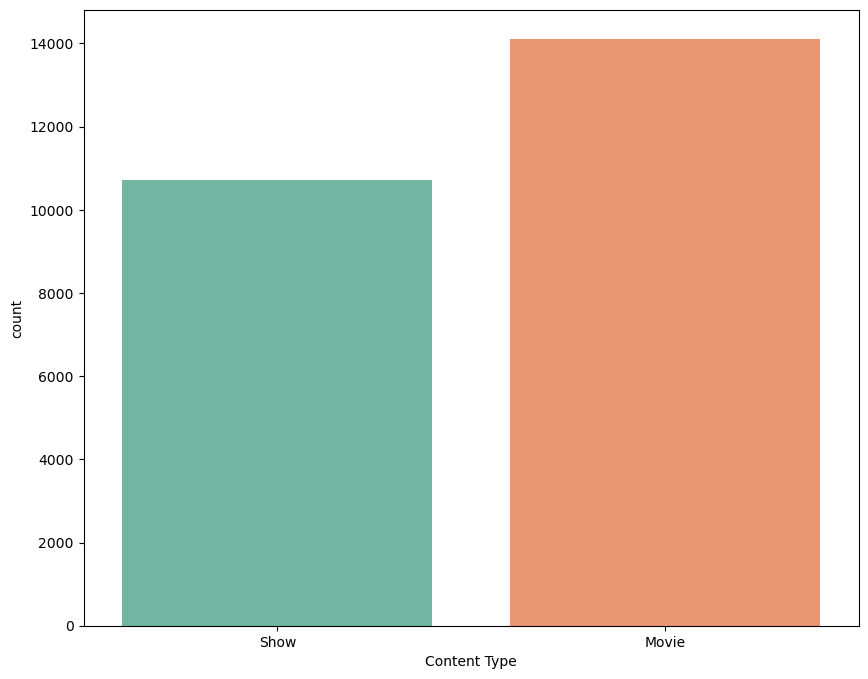

In [106]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x=df['Content Type'],palette='Set2')
plt

In [115]:
df['Language Indicator'].value_counts()

Language Indicator
English        17268
Non-English     3252
Japanese        2297
Korean          1582
Hindi            374
Russian           39
Name: count, dtype: int64

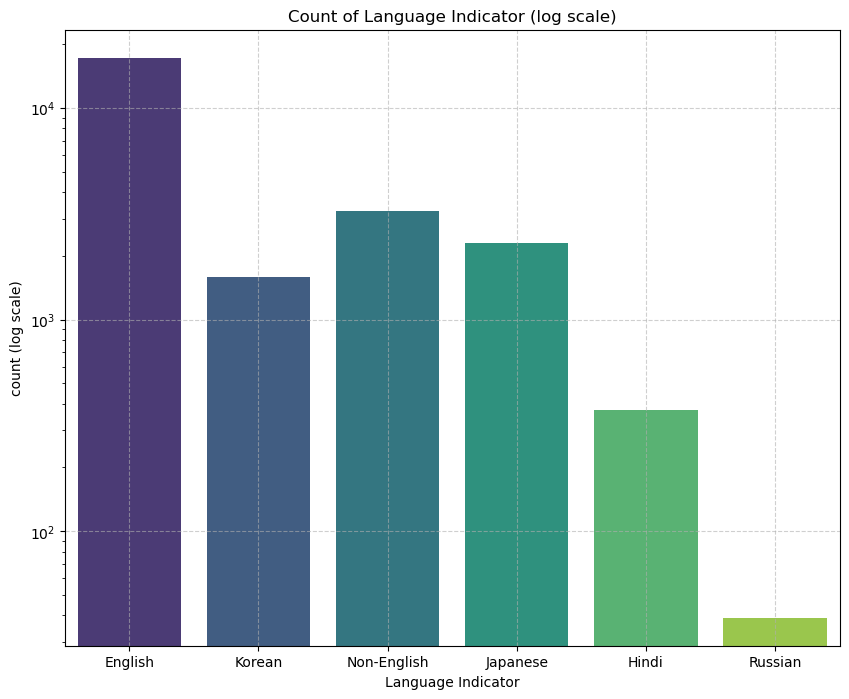

In [132]:
plt.figure(figsize=(10,8))
plt.title("Count of Language Indicator (log scale)")
sns.countplot(data=df,x=df['Language Indicator'],palette='viridis')
plt.ylabel("count (log scale)")
plt.yscale('log')

plt.grid(True,linestyle='--',alpha=0.6)

<Axes: xlabel='Available Globally?', ylabel='count'>

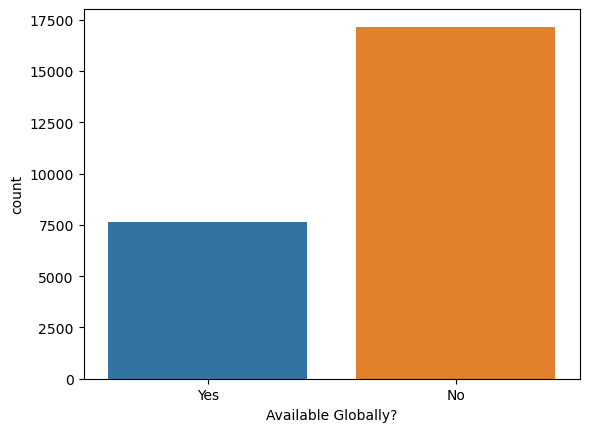

In [127]:
sns.countplot(data=df,x=df['Available Globally?'])

## MULTI-VARIATE

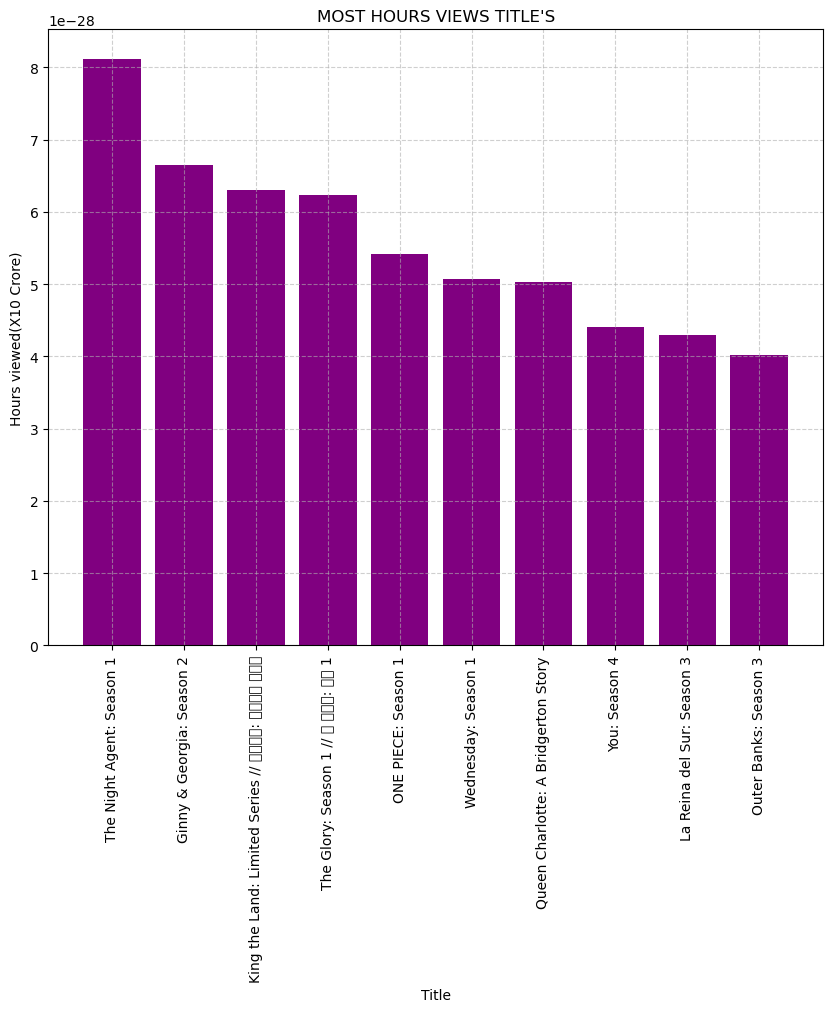

In [98]:
most_hours_viewed=df[['Title','Hours Viewed']].sort_values(by=['Hours Viewed'],ascending=False).head(10)


plt.figure(figsize=(10,8))
plt.title("MOST HOURS VIEWS TITLE'S")
plt.bar(most_hours_viewed['Title'],most_hours_viewed['Hours Viewed'],color='purple')
plt.xticks(rotation=90)
plt.xlabel("Title")
plt.ylabel("Hours viewed(X10 Crore)")
plt.grid(True,linestyle='--',alpha=0.6)

In [142]:
avg_hours=df.groupby('Content Type')['Hours Viewed'].mean()

In [143]:
avg_hours=pd.DataFrame(avg_hours).reset_index()
avg_hours

,Content Type,Hours Viewed
0,Movie,3.590315e-30
1,Show,1.006389e-29


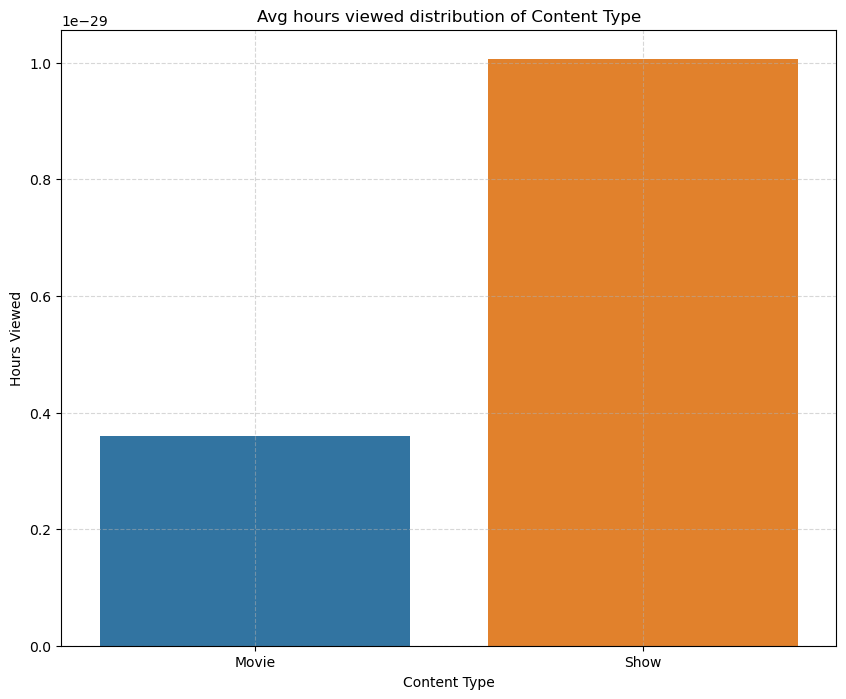

In [175]:
plt.figure(figsize=(10,8))
plt.title('Avg hours viewed distribution of Content Type')
sns.barplot(data=avg_hours,x='Content Type',y='Hours Viewed')
plt.grid(True,linestyle='--',alpha=0.5)

In [159]:
df

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,8.121000e-28,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,6.651000e-28,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,6.228000e-28,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,5.077000e-28,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,5.030000e-28,English,Movie
...,...,...,...,...,...,...
24807,We Are Black and British: Season 1,No,NaT,1.000000e-31,English,Show
24808,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,1.000000e-31,English,Movie
24809,Whitney Cummings: Jokes,No,2022-07-26,1.000000e-31,English,Movie
24810,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,1.000000e-31,English,Movie


In [177]:
Top_10_English=df[df['Language Indicator']=='English'].sort_values(by='Hours Viewed',ascending=False).head(10)
Top_10_English

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,8.121000e-28,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,6.651000e-28,English,Show
18214,ONE PIECE: Season 1,Yes,2023-08-31,5.419000e-28,English,Show
3,Wednesday: Season 1,Yes,2022-11-23,5.077000e-28,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,5.030000e-28,English,Movie
5,You: Season 4,Yes,2023-02-09,4.406000e-28,English,Show
6,La Reina del Sur: Season 3,No,2022-12-30,4.296000e-28,English,Show
7,Outer Banks: Season 3,Yes,2023-02-23,4.025000e-28,English,Show
18219,Sex Education: Season 4,Yes,2023-09-21,3.747000e-28,English,Show
18218,The Witcher: Season 3,Yes,2023-06-29,3.638000e-28,English,Show


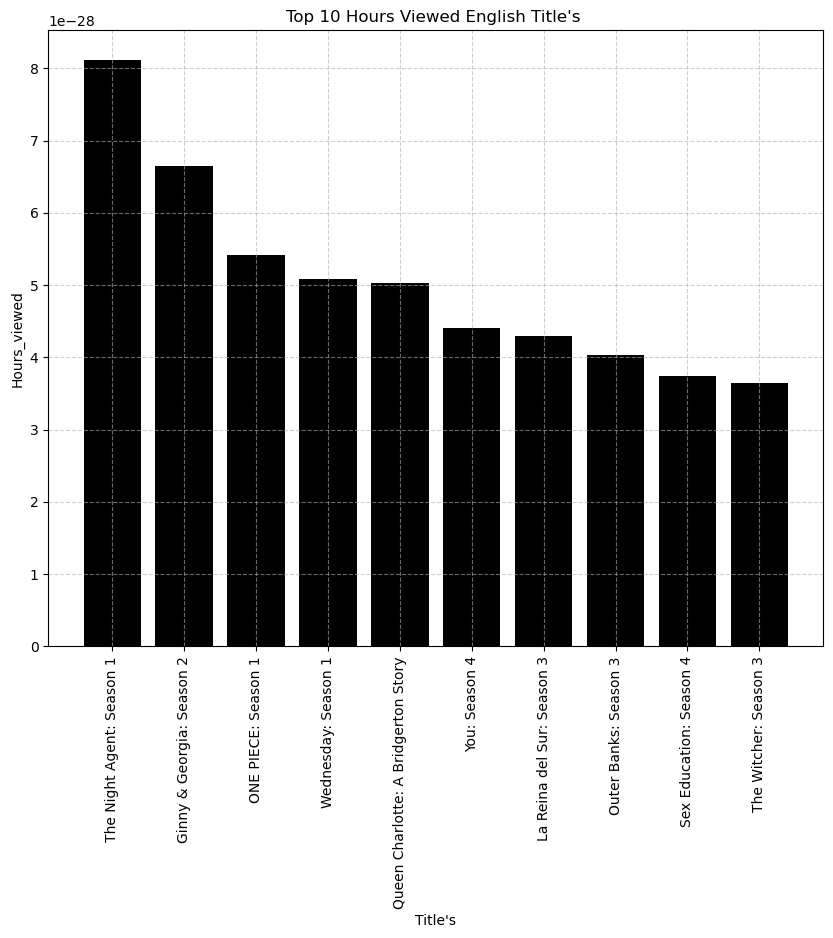

In [180]:
plt.figure(figsize=(10,8))
plt.title("Top 10 Hours Viewed English Title's ")
plt.bar(data=Top_10_English,x=Top_10_English['Title'],height=Top_10_English['Hours Viewed'],color='black')
plt.xticks(rotation=90)
plt.xlabel("Title's")
plt.ylabel("Hours_viewed")
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

In [236]:
c_type=pd.DataFrame(Top_10_English['Content Type'].value_counts()).reset_index()


In [181]:
df['Language Indicator'].unique()

array(['English', 'Korean', 'Non-English', 'Japanese', 'Hindi', 'Russian'],
      dtype=object)

In [185]:
Top_10_Korean=df[df['Language Indicator']=='Korean'].sort_values(by='Hours Viewed',ascending=False).head(10)
Top_10_Korean

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,6.302000e-28,Korean,Movie
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,6.228000e-28,Korean,Show
14,Physical: 100: Season 1 // 피지컬: 100: 시즌 1,Yes,2023-01-24,2.350000e-28,Korean,Show
15,Crash Course in Romance: Limited Series // 일타 ...,Yes,2023-01-14,2.348000e-28,Korean,Movie
18310,Destined with You: Limited Series // 이 연애는 불가항...,Yes,2023-08-23,2.220000e-28,Korean,Movie
18334,Strong Girl Nam-soon: Limited Series // 힘쎈여자 강...,Yes,2023-10-07,1.957000e-28,Korean,Movie
24,Doctor Cha: Limited Series // 닥터 차정숙: 리미티드 시리즈,Yes,2023-04-15,1.947000e-28,Korean,Movie
18389,True Beauty: Limited Series // 여신강림: 리미티드 시리즈,No,NaT,1.748000e-28,Korean,Movie
18262,Celebrity: Limited Series // 셀러브리티: 리미티드 시리즈,Yes,2023-06-30,1.640000e-28,Korean,Movie
40,Alchemy of Souls: Part 1 // 환혼: 파트 1,Yes,2022-06-18,1.553000e-28,Korean,Movie


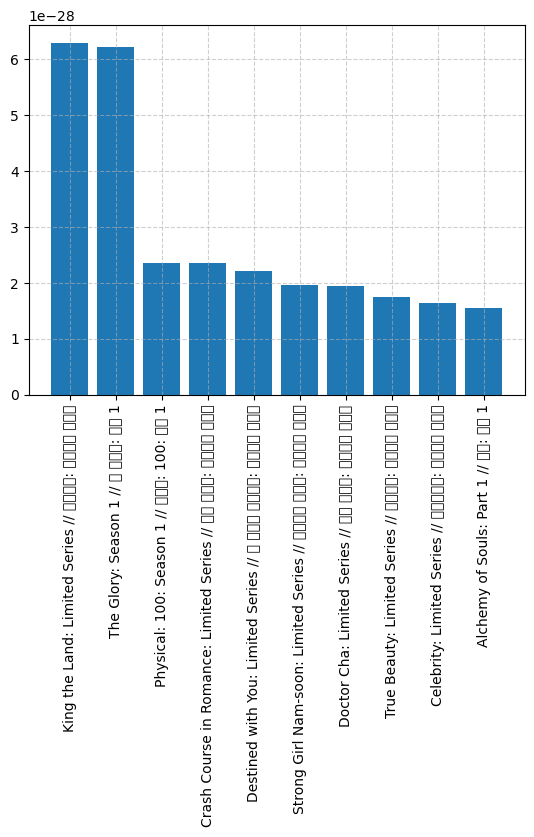

In [207]:
plt.bar(x=Top_10_Korean['Title'],height=Top_10_Korean['Hours Viewed'])
plt.xticks(rotation=90)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

In [235]:
k_type=pd.DataFrame(Top_10_Korean['Content Type'].value_counts()).reset_index()


In [212]:
Top_10_jap=df[df['Language Indicator']=='Japanese'].sort_values(by='Hours Viewed',ascending=False).head(10)
Top_10_jap

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
18293,Baki Hanma: Season 2 // 範馬刃牙: シーズン2,Yes,2023-07-26,1.607000e-28,Japanese,Show
39,Alice in Borderland: Season 2 // 今際の国のアリス: シーズン2,Yes,2022-12-22,1.576000e-28,Japanese,Show
97,Demon Slayer: Kimetsu no Yaiba: Tanjiro Kamado...,No,NaT,9.580000e-29,Japanese,Movie
18761,ONE PIECE: East Blue // ワンピース: イーストブルー編,No,NaT,9.520000e-29,Japanese,Movie
110,Alice in Borderland: Season 1 // 今際の国のアリス: シーズン1,Yes,2020-12-10,9.220000e-29,Japanese,Show
143,Hajime no Ippo: The Fighting!: Season 1 // はじめ...,No,NaT,8.030000e-29,Japanese,Show
18321,Burn the House Down: Season 1 // 御手洗家、炎上する: シーズン1,Yes,2023-07-13,7.850000e-29,Japanese,Show
147,Record of Ragnarok: Season 2 // 終末のワルキューレ: シーズン２,No,2023-01-26,7.820000e-29,Japanese,Show
18273,Yu Yu Hakusho: Season 1 // 幽☆遊☆白書: シーズン1,Yes,2023-12-14,6.920000e-29,Japanese,Show
18302,My Happy Marriage: Season 1 // わたしの幸せな結婚: シーズン1,Yes,2023-07-05,6.420000e-29,Japanese,Show


In [234]:
Jap_type=pd.DataFrame(Top_10_jap['Content Type'].value_counts()).reset_index()


In [216]:
Top_10_Ind=df[df['Language Indicator']=='Hindi'].sort_values(by='Hours Viewed',ascending=False).head(10)
Top_10_Ind

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
329,Rana Naidu: Season 1 // राणा नायडू: सीज़न 1,Yes,2023-03-10,4.630000e-29,Hindi,Show
18525,Kaala Paani: Season 1 // काला पानी: सीज़न 1,Yes,2023-10-18,4.230000e-29,Hindi,Show
18353,The Railway Men - The Untold Story Of Bhopal 1...,Yes,2023-11-18,4.210000e-29,Hindi,Movie
394,Chor Nikal Ke Bhaga // चोर निकल के भागा,Yes,2023-03-24,4.170000e-29,Hindi,Movie
18484,Guns & Gulaabs: Season 1 // गन्ज़ & गुलाब्ज़: सी...,Yes,2023-08-18,3.940000e-29,Hindi,Show
592,Mission Majnu // मिशन मजनू,Yes,2023-01-20,3.120000e-29,Hindi,Movie
644,Mrs. Chatterjee vs Norway // मिसेज़ चैटर्जी vs ...,No,NaT,2.960000e-29,Hindi,Movie
717,Class: Season 1 // क्लास: सीज़न 1,Yes,2023-02-03,2.770000e-29,Hindi,Show
755,Tu Jhoothi Main Makkaar // तू झूठी मैं मक्कार,No,NaT,2.710000e-29,Hindi,Movie
833,Shehzada // शहज़ादा,No,NaT,2.480000e-29,Hindi,Movie


- TAKEAWAY : These are the top 10 titles by hours viewed

In [233]:
Hin_type=pd.DataFrame(Top_10_Ind['Content Type'].value_counts()).reset_index()

In [219]:
Top_10_Rus=df[df['Language Indicator']=='Russian'].sort_values(by='Hours Viewed',ascending=False).head(10)
Top_10_Rus

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
771,"Better Than Us: Season 1 // Лучше, чем люди: 1...",Yes,2019-08-16,2.660000e-29,Russian,Show
19787,"Better Than Us: Season 1 // Лучше, чем люди: 1...",Yes,2019-08-16,1.980000e-29,Russian,Show
1418,To the Lake: Season 1 // Эпидемия: 1 сезон,Yes,2020-10-07,1.500000e-29,Russian,Show
19672,To the Lake: Season 1 // Эпидемия: 1 сезон,Yes,2020-10-07,1.100000e-29,Russian,Show
2152,Major Grom: Plague Doctor // Майор Гром: Чумно...,No,2021-05-05,9.400000e-30,Russian,Movie
2768,Masha and the Bear: Nursery Rhymes: Season 1 /...,No,NaT,7.000000e-30,Russian,Show
18477,Masha and the Bear: Nursery Rhymes: Season 1 /...,No,NaT,6.400000e-30,Russian,Show
3624,Chernobyl 1986 // Чернобыль,No,2021-06-02,4.900000e-30,Russian,Movie
4677,Silver Skates // Серебряные коньки,No,2021-05-05,3.200000e-30,Russian,Movie
4913,Invasion // Вторжение,No,NaT,2.900000e-30,Russian,Movie


- TAKEAWAY - These are the top 10 titles by hours viewed

In [232]:
Rus_type=pd.DataFrame(Top_10_Rus['Content Type'].value_counts()).reset_index()



In [213]:
Top_10_non=df[df['Language Indicator']=='Non-English'].sort_values(by='Hours Viewed',ascending=False).head(10)
Top_10_non

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
31,The Marked Heart: Season 2 // Pálpito: Tempora...,Yes,2023-04-19,1.743000e-28,Non-English,Show
34,"Pablo Escobar, el patrón del mal: Season 1",Yes,NaT,1.701000e-28,Non-English,Show
19044,"Pablo Escobar, el patrón del mal: Season 1",Yes,NaT,1.476000e-28,Non-English,Show
52,Wrong Side of the Tracks: Season 2 // Entrevía...,No,2023-03-01,1.401000e-28,Non-English,Show
54,Triptych: Season 1 // Tríada: Temporada 1,Yes,2023-02-22,1.393000e-28,Non-English,Show
61,The Marked Heart: Season 1 // Pálpito: Tempora...,Yes,2022-04-20,1.335000e-28,Non-English,Show
65,Pasión de Gavilanes: Season 1,No,NaT,1.292000e-28,Non-English,Show
18497,Hidden Love // 偷偷藏不住,No,NaT,1.157000e-28,Non-English,Movie
20354,Pasión de Gavilanes: Season 1,No,NaT,1.151000e-28,Non-English,Show
18279,Elite: Season 7 // Élite: Temporada 7,Yes,2023-10-20,1.084000e-28,Non-English,Show


In [230]:
non_type=pd.DataFrame(Top_10_non['Content Type'].value_counts()).reset_index()

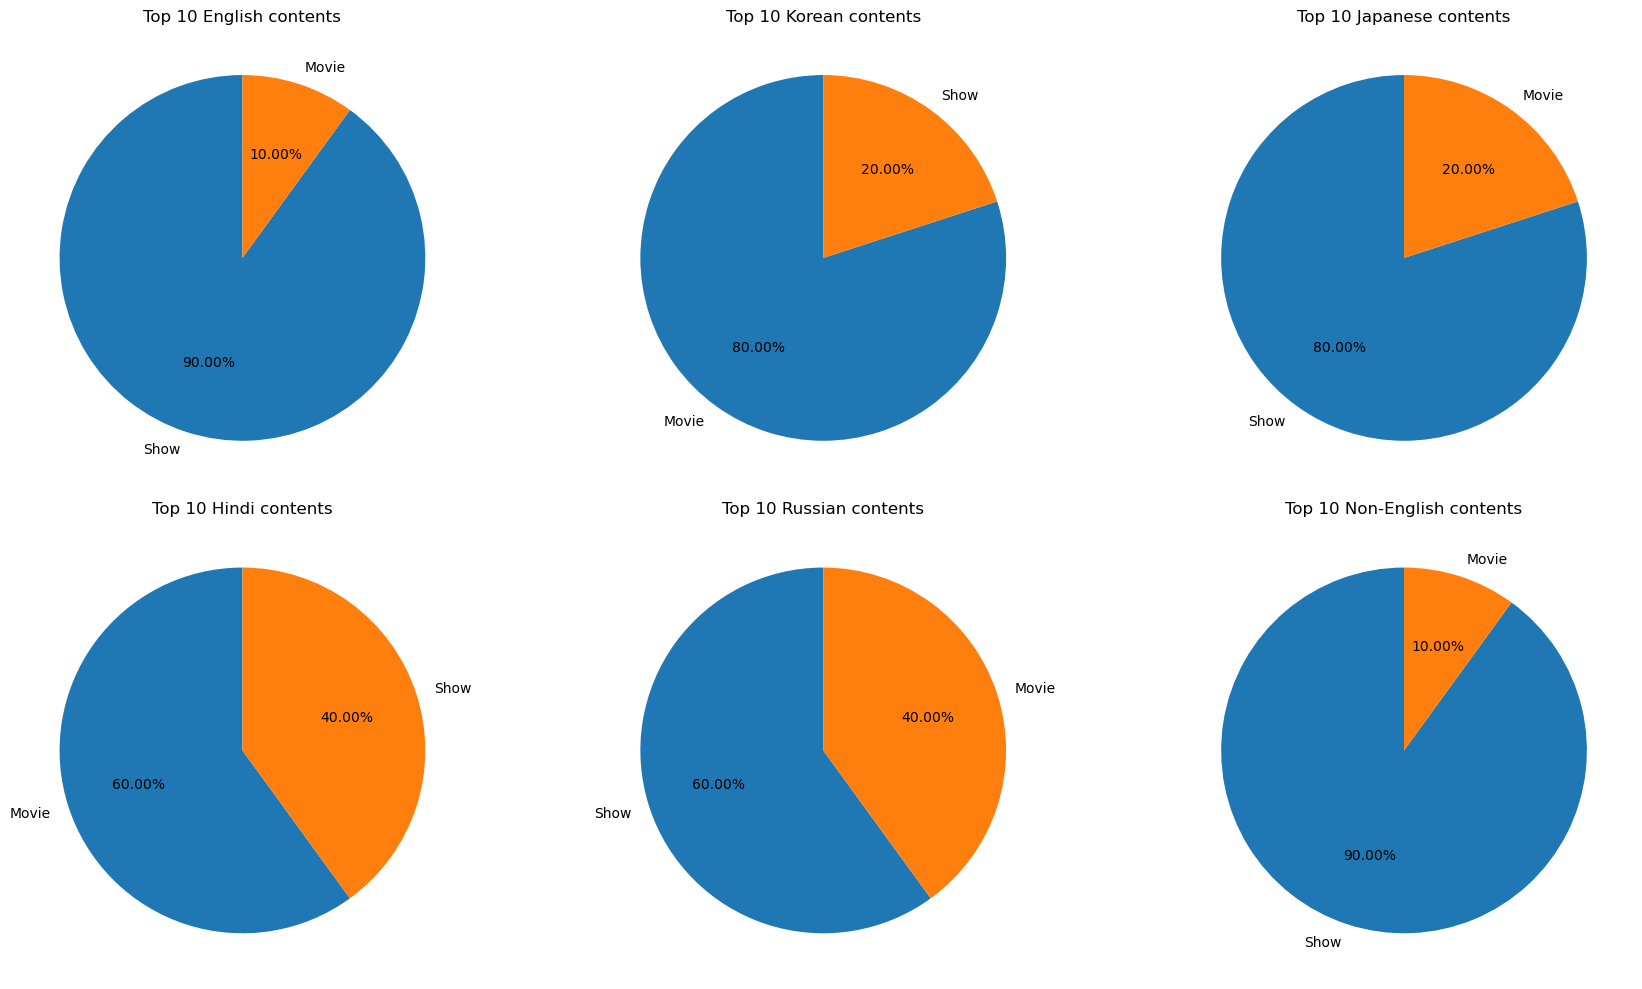

In [229]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows × 3 columns for 6 pie charts
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Data and titles for each pie chart
pie_data = [
    (Top_10_English, "Top 10 English contents"),
    (Top_10_Korean, "Top 10 Korean contents"),
    (Top_10_jap, "Top 10 Japanese contents"),
    (Top_10_Ind, "Top 10 Hindi contents"),
    (Top_10_Rus, "Top 10 Russian contents"),
    (Top_10_non, "Top 10 Non-English contents")
]

# Loop through each subplot and plot pie charts
for ax, (df_lang, title) in zip(axs.flatten(), pie_data):
    c_type = df_lang['Content Type'].value_counts().reset_index()
    c_type.columns = ['Content Type', 'count']
    
    ax.pie(
        c_type['count'],
        labels=c_type['Content Type'],
        autopct='%1.2f%%',
        startangle=90
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()


- TAKEAWAY - distribution of contents(Movie,Show) by languages 

In [157]:
df.groupby('Language Indicator')[['Title','','Hours Viewed']].sum()

,Title,Hours Viewed
Language Indicator,,
English,The Night Agent: Season 1Ginny & Georgia: Seas...,1.244417e-25
Hindi,Rana Naidu: Season 1 // राणा नायडू: सीज़न 1Chor...,9.261000e-28
Japanese,Alice in Borderland: Season 2 // 今際の国のアリス: シーズ...,7.102000e-27
Korean,The Glory: Season 1 // 더 글로리: 시즌 1Physical: 10...,1.537840e-26
Non-English,The Marked Heart: Season 2 // Pálpito: Tempora...,1.043910e-26
Russian,"Better Than Us: Season 1 // Лучше, чем люди: 1...",1.146000e-28


- TAKEAWAY : These are the top titles according to language and hoursviewed

In [74]:
df['Release Date'].dt.year.unique()

array([2023., 2022., 2021., 2020.,   nan, 2018., 2019., 2017., 2016.,
       2011., 2014., 2015., 2013., 2010., 2012.])

In [69]:
df[df['Release Date'].dt.year ==2023]

786

In [75]:
df[df['Release Date'].dt.year ==2022].shape[0]

1550

In [76]:
df[df['Release Date'].dt.year ==2021].shape[0]

1283

In [77]:
df[df['Release Date'].dt.year==2020].shape[0]

1256

In [78]:
df[df['Release Date'].dt.year==2019].shape[0]

1144

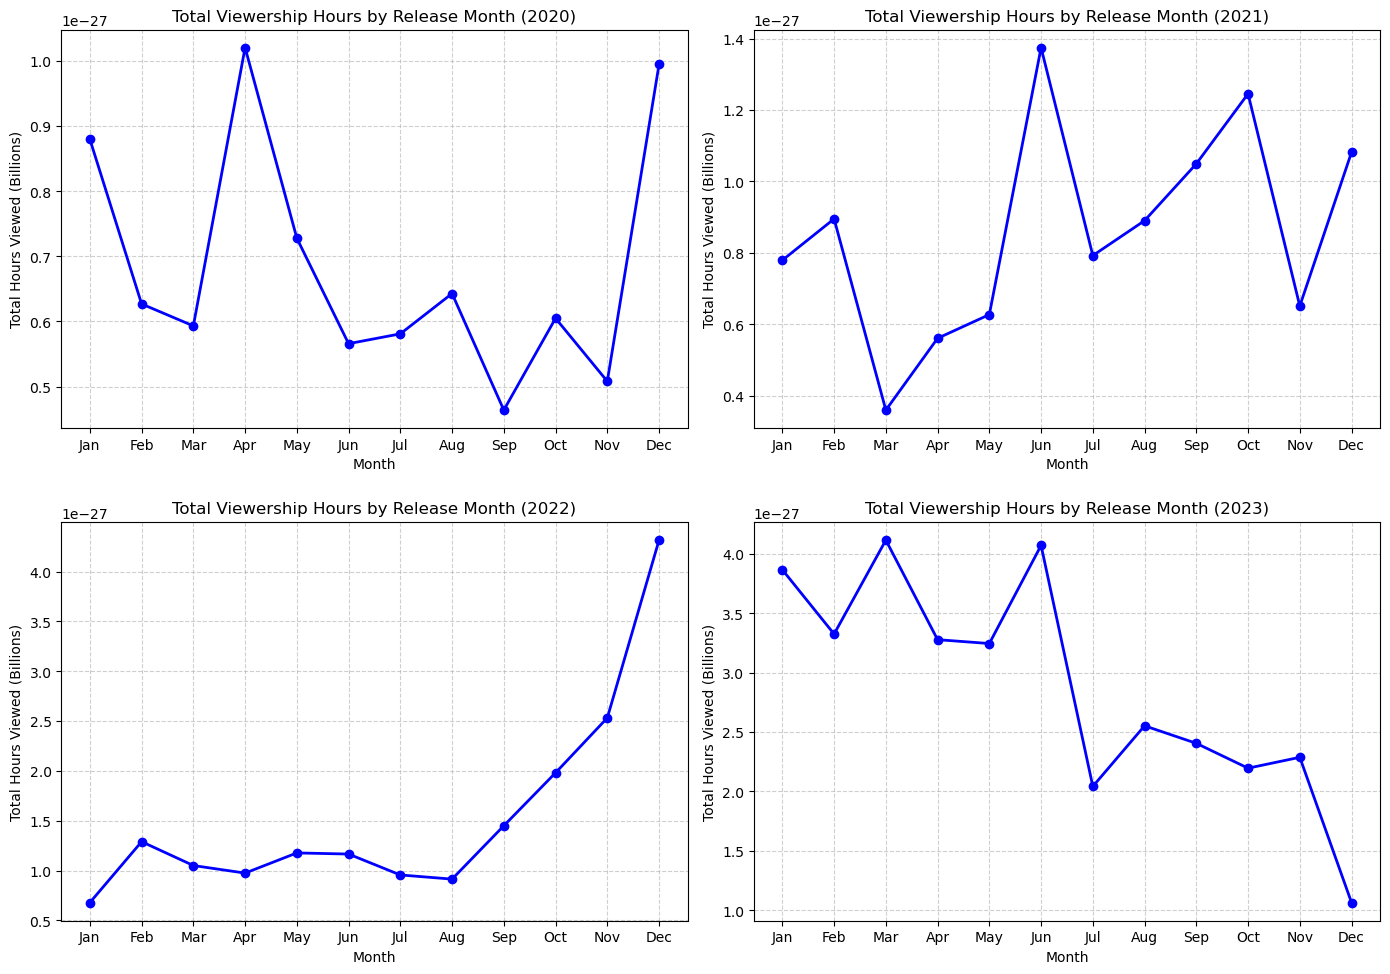

In [292]:
years = [2020, 2021, 2022, 2023]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()                                       # flatten for easy looping

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Loop through years and axes
for i, year in enumerate(years):
    df_year = df[df['Release Date'].dt.year == year]
    df_year['Release Month'] = df_year['Release Date'].dt.month
    monthly_viewership = df_year.groupby('Release Month')['Hours Viewed'].sum()
    
    axs[i].plot(monthly_viewership.index, monthly_viewership.values, 
                marker='o', color='blue', linewidth=2)
    axs[i].set_xticks(range(1, 13))
    axs[i].set_xticklabels(month_names)
    axs[i].set_title(f'Total Viewership Hours by Release Month ({year})', fontsize=12)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Total Hours Viewed (Billions)')
    axs[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

- TAKEAWAY - These are the graphical representation of hours viewed in months of years(2020,2021,2022,2023,2024)
    - 2020 & 2021 → relatively low viewership hours.
       - 2022 shows a huge surge in late months (Oct–Dec), with December           hitting the highest viewership overall.
       - 2023 maintains high early-year viewership (Jan–Mar), but then shows a decline from mid-year onward.

In [375]:
netflix_2020=df[df['Release Date'].dt.year==2020]
netflix_2020['month']=netflix_2020['Release Date'].dt.month_name()

netflix_2021=df[df['Release Date'].dt.year==2021]
netflix_2021['month']=netflix_2021['Release Date'].dt.month_name()
netflix_2022=df[df['Release Date'].dt.year==2022]
netflix_2022


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,6.228000e-28,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,5.077000e-28,English,Show
6,La Reina del Sur: Season 3,No,2022-12-30,4.296000e-28,English,Show
10,Manifest: Season 4,Yes,2022-11-04,2.626000e-28,English,Show
12,Firefly Lane: Season 2,Yes,2022-12-02,2.515000e-28,English,Show
...,...,...,...,...,...,...
24774,Stand Out: An LGBTQ+ Celebration,Yes,2022-06-09,1.000000e-31,English,Movie
24781,That’s My Time with David Letterman: Season 1,Yes,2022-06-07,1.000000e-31,Non-English,Show
24783,The Best of Netflix Is a Joke: The Festival,Yes,2022-07-17,1.000000e-31,English,Movie
24785,"The Hall: Honoring George Carlin, Robin Willia...",Yes,2022-05-19,1.000000e-31,English,Movie


In [380]:
netflix_2020['Content Type'].value_counts()

Content Type
Show     720
Movie    536
Name: count, dtype: int64

In [381]:
netflix_2021['Content Type'].value_counts()

Content Type
Show     711
Movie    572
Name: count, dtype: int64

In [382]:
netflix_2022['Content Type'].value_counts()

Content Type
Show     844
Movie    706
Name: count, dtype: int64

In [383]:
netflix_2023['Content Type'].value_counts()

Content Type
Show     480
Movie    306
Name: count, dtype: int64

In [376]:
netflix_2020.groupby('month')['Content Type'].value_counts()

month      Content Type
April      Show            62
           Movie           45
August     Show            71
           Movie           35
December   Movie           67
           Show            49
February   Show            58
           Movie           35
January    Show            81
           Movie           41
July       Show            55
           Movie           54
June       Show            55
           Movie           36
March      Show            74
           Movie           41
May        Show            66
           Movie           32
November   Movie           44
           Show            38
October    Movie           54
           Show            47
September  Show            64
           Movie           52
Name: count, dtype: int64

In [ ]:
df['Release Date']=df['Release Date'].fillna(df['Release Date'].dt.year==2022)

In [242]:
netflix_2023=df[df['Release Date'].dt.year==2023]
netflix_2023

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,8.121000e-28,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,6.651000e-28,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,5.030000e-28,English,Movie
5,You: Season 4,Yes,2023-02-09,4.406000e-28,English,Show
7,Outer Banks: Season 3,Yes,2023-02-23,4.025000e-28,English,Show
...,...,...,...,...,...,...
23796,IRL - In Real Love: Season 1,Yes,2023-04-06,7.000000e-31,English,Show
23948,The Kingdom: Season 2 // El Reino: Season 2,Yes,2023-03-22,6.000000e-31,English,Show
24124,Ariyoshi Assists: Season 1 // 名アシスト有吉: シーズン1,Yes,2023-03-14,4.000000e-31,Japanese,Show
24166,Gunther's Millions: Limited Series,Yes,2023-02-01,4.000000e-31,English,Movie


In [244]:
df.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Language Indicator', 'Content Type'],
      dtype='object')

In [251]:
df_2023

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Released_month
0,The Night Agent: Season 1,Yes,2023-03-23,8.121000e-28,English,Show,3,March
1,Ginny & Georgia: Season 2,Yes,2023-01-05,6.651000e-28,English,Show,1,January
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,5.030000e-28,English,Movie,5,May
5,You: Season 4,Yes,2023-02-09,4.406000e-28,English,Show,2,February
7,Outer Banks: Season 3,Yes,2023-02-23,4.025000e-28,English,Show,2,February
...,...,...,...,...,...,...,...,...
23796,IRL - In Real Love: Season 1,Yes,2023-04-06,7.000000e-31,English,Show,4,April
23948,The Kingdom: Season 2 // El Reino: Season 2,Yes,2023-03-22,6.000000e-31,English,Show,3,March
24124,Ariyoshi Assists: Season 1 // 名アシスト有吉: シーズン1,Yes,2023-03-14,4.000000e-31,Japanese,Show,3,March
24166,Gunther's Millions: Limited Series,Yes,2023-02-01,4.000000e-31,English,Movie,2,February


In [260]:
grouped_2023=df_2023.groupby('Released_month')['Hours Viewed'].mean()
grouped_2023=pd.DataFrame(df_2023.groupby('Released_month')['Hours Viewed'].sum()).reset_index()
grouped_2023

,Released_month,Hours Viewed
0,April,3.277200e-27
1,August,2.552600e-27
2,December,1.065100e-27
3,February,3.324600e-27
4,January,3.865400e-27
5,July,2.042700e-27
6,June,4.070200e-27
7,March,4.114700e-27
8,May,3.244700e-27
9,November,2.287500e-27


In [290]:
grouped_2023

,Released_month,Hours Viewed
4,January,3.865400e-27
3,February,3.324600e-27
7,March,4.114700e-27
0,April,3.277200e-27
8,May,3.244700e-27
6,June,4.070200e-27
5,July,2.042700e-27
1,August,2.552600e-27
11,September,2.405200e-27
10,October,2.196000e-27


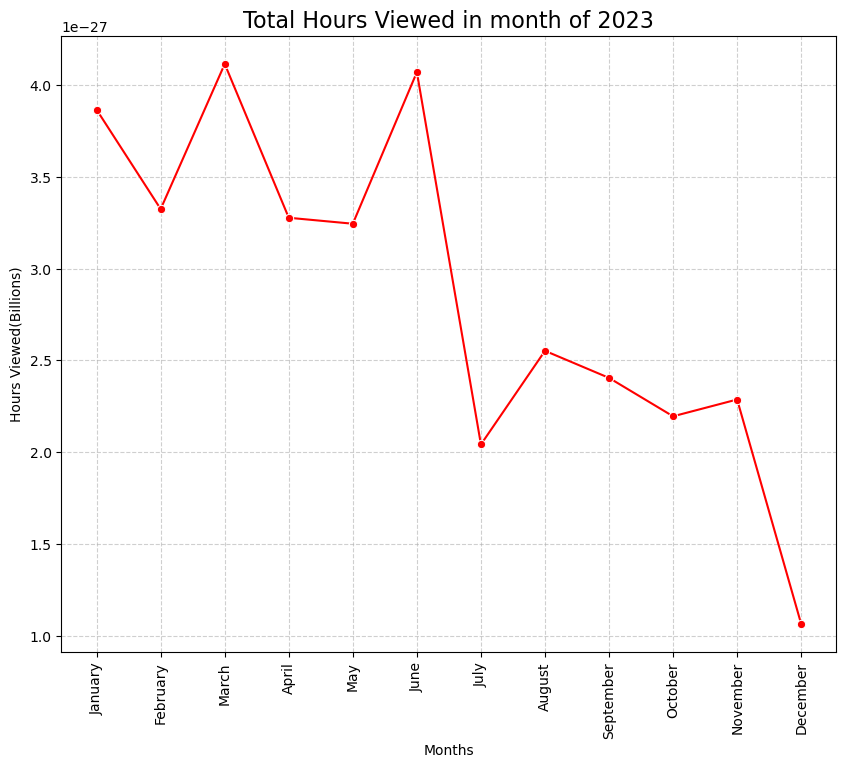

In [308]:
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']

grouped_2023['Released_month']=pd.Categorical(grouped_2023['Released_month'],
                                             categories=month_order,
                                             ordered=True)
grouped_2023=grouped_2023.sort_values('Released_month')
plt.figure(figsize=(10,8))
plt.title("Total Hours Viewed in month of 2023",fontsize=16)
sns.lineplot(data=grouped_2023,
             x='Released_month',
             y='Hours Viewed',
             marker='o',
             color='red')
plt.xlabel("Months")
plt.ylabel("Hours Viewed(Billions)")
plt.grid(True,linestyle='--',alpha=0.6)
plt.xticks(rotation=90)
plt.show()

- TAKEAWAY :The viewership trend in 2023 shows noticeable peaks in March  and June, indicating strong content releases during these months. January also started the year with relatively high engagement , possibly driven by post-holiday streaming habits.
 * However, viewership gradually declined after June, reaching the lowest point in December a potential sign of fewer major releases or competition from other entertainment sources during the holiday season.
 * Overall, spring months (March–June) performed best, while late-year months (October–December) saw weaker performance. This insight can guide future release scheduling to maximize audience engagement.
 

In [297]:
top_5_title=df_2023.nlargest(5,'Hours Viewed')
top_5_title[['Title','Hours Viewed','Language Indicator','Content Type','Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,8.121000e-28,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,6.651000e-28,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,6.302000e-28,Korean,Movie,2023-06-17
18214,ONE PIECE: Season 1,5.419000e-28,English,Show,2023-08-31
4,Queen Charlotte: A Bridgerton Story,5.030000e-28,English,Movie,2023-05-04


- TAKEAWAY: The top 5 titles of 2023 are dominated by English-language content, with both Shows and Movies represented. These high-performing titles achieved the highest total hours viewed in the year, signaling strong audience interest in globally appealing releases. The concentration of hours among just a few titles suggests that blockbuster releases significantly drive overall platform engagement.

In [298]:
grouped_2023

,Released_month,Hours Viewed
4,January,3.865400e-27
3,February,3.324600e-27
7,March,4.114700e-27
0,April,3.277200e-27
8,May,3.244700e-27
6,June,4.070200e-27
5,July,2.042700e-27
1,August,2.552600e-27
11,September,2.405200e-27
10,October,2.196000e-27


In [299]:
df_2023[[]]

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Released_month
0,The Night Agent: Season 1,Yes,2023-03-23,8.121000e-28,English,Show,3,March
1,Ginny & Georgia: Season 2,Yes,2023-01-05,6.651000e-28,English,Show,1,January
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,5.030000e-28,English,Movie,5,May
5,You: Season 4,Yes,2023-02-09,4.406000e-28,English,Show,2,February
7,Outer Banks: Season 3,Yes,2023-02-23,4.025000e-28,English,Show,2,February
...,...,...,...,...,...,...,...,...
23796,IRL - In Real Love: Season 1,Yes,2023-04-06,7.000000e-31,English,Show,4,April
23948,The Kingdom: Season 2 // El Reino: Season 2,Yes,2023-03-22,6.000000e-31,English,Show,3,March
24124,Ariyoshi Assists: Season 1 // 名アシスト有吉: シーズン1,Yes,2023-03-14,4.000000e-31,Japanese,Show,3,March
24166,Gunther's Millions: Limited Series,Yes,2023-02-01,4.000000e-31,English,Movie,2,February


In [300]:
df_2023[['Released_month','Content Type']]

,Released_month,Content Type
0,March,Show
1,January,Show
4,May,Movie
5,February,Show
7,February,Show
...,...,...
23796,April,Show
23948,March,Show
24124,March,Show
24166,February,Movie


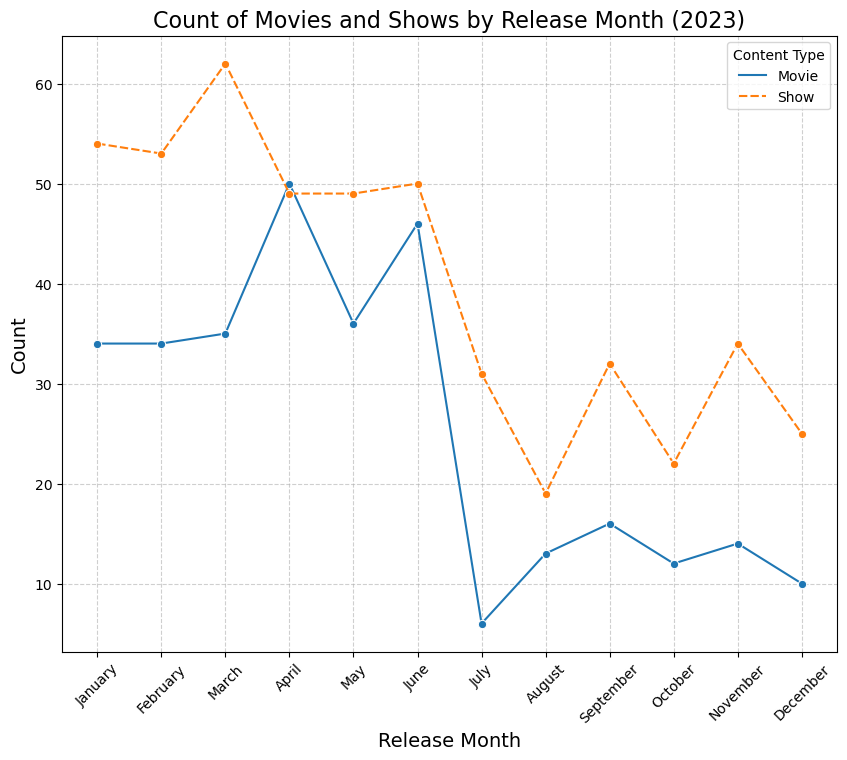

In [307]:
summary=(df_2023.groupby(['Released_month','Content Type']).size()
.unstack(fill_value=0)
.reindex(month_order))

plt.figure(figsize=(10,8))
sns.lineplot(data=summary, marker="o")  
plt.title("Count of Movies and Shows by Release Month (2023)", fontsize=16)
plt.xlabel("Release Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()

- TAKEAWAY : In 2023, shows consistently outnumbered movies across almost all months, with a noticeable spike in March for shows, reaching their highest release count of the year. Movies saw their peak releases in April and June but experienced a sharp drop in July, hitting their lowest point. Both movies and shows showed reduced releases during mid-year (July–August) and towards the end of the year, suggesting possible seasonal or production cycle influences.

In [325]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    else:
        return ' fall'

df_2023['Released_season']=df_2023['Release Month'].apply(get_season)

In [326]:
df_2023

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Released_month,Released_season
0,The Night Agent: Season 1,Yes,2023-03-23,8.121000e-28,English,Show,3,March,spring
1,Ginny & Georgia: Season 2,Yes,2023-01-05,6.651000e-28,English,Show,1,January,Winter
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,5.030000e-28,English,Movie,5,May,spring
5,You: Season 4,Yes,2023-02-09,4.406000e-28,English,Show,2,February,Winter
7,Outer Banks: Season 3,Yes,2023-02-23,4.025000e-28,English,Show,2,February,Winter
...,...,...,...,...,...,...,...,...,...
23796,IRL - In Real Love: Season 1,Yes,2023-04-06,7.000000e-31,English,Show,4,April,spring
23948,The Kingdom: Season 2 // El Reino: Season 2,Yes,2023-03-22,6.000000e-31,English,Show,3,March,spring
24124,Ariyoshi Assists: Season 1 // 名アシスト有吉: シーズン1,Yes,2023-03-14,4.000000e-31,Japanese,Show,3,March,spring
24166,Gunther's Millions: Limited Series,Yes,2023-02-01,4.000000e-31,English,Movie,2,February,Winter


In [327]:
grouped_seasonal=df_2023.groupby('Released_season')['Hours Viewed'].sum()
grouped_seasonal=pd.DataFrame(grouped_seasonal).reset_index()
grouped_seasonal

,Released_season,Hours Viewed
0,fall,6.888700e-27
1,Winter,8.255100e-27
2,spring,1.063660e-26
3,summer,8.665500e-27


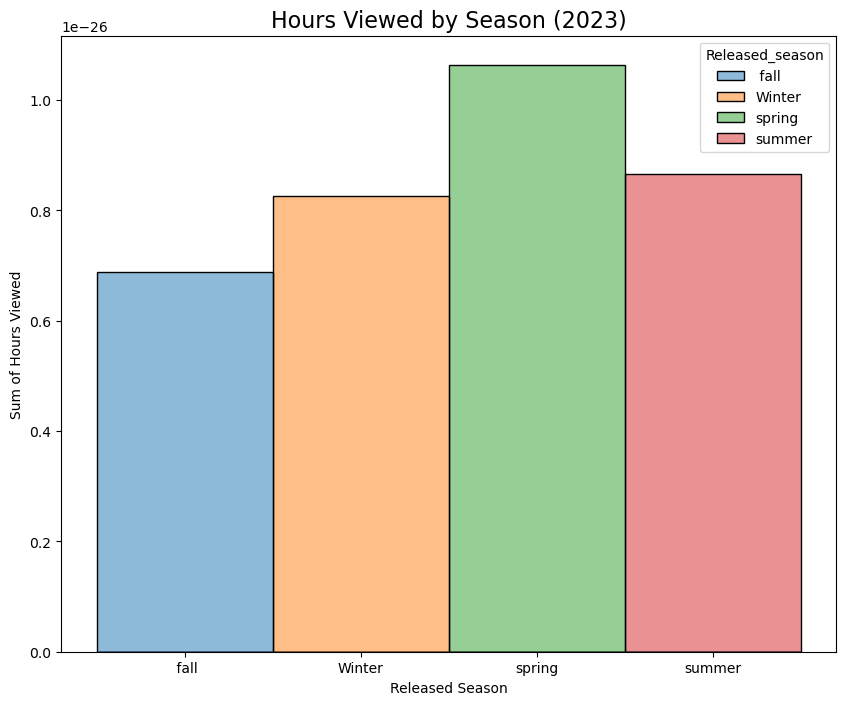

In [339]:
plt.figure(figsize=(10,8))
sns.histplot(data=grouped_seasonal,x=grouped_seasonal['Released_season'],
         weights=grouped_seasonal['Hours Viewed'],hue='Released_season')
plt.title("Hours Viewed by Season (2023)",fontsize=16)
plt.xlabel('Released Season')
plt.ylabel('Sum of Hours Viewed')
plt.show()

- TAKEAWAY : The distribution of hours viewed depends on Seasons in this visualization as we can see in the spring season we have highest hours of viewer's

  *In fall season we have the least viewers 
    

In [348]:
month_count=df_2023.groupby('Released_month')['Title'].count().reindex(month_order).reset_index()
month_count

,Released_month,Title
0,January,88
1,February,87
2,March,97
3,April,99
4,May,85
5,June,96
6,July,37
7,August,32
8,September,48
9,October,34


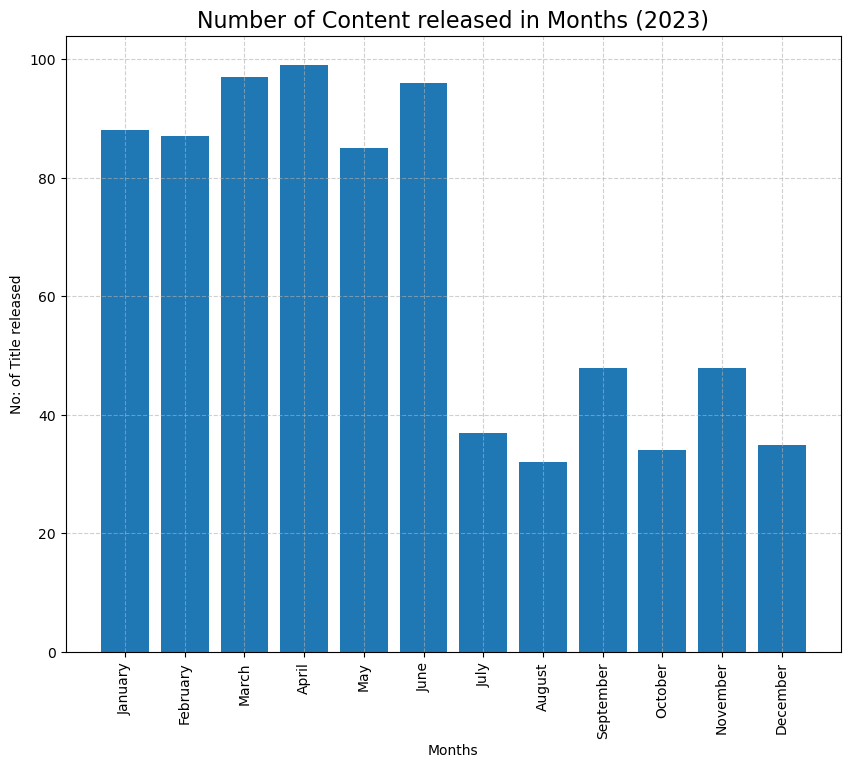

In [354]:
plt.figure(figsize=(10,8))
plt.title("Number of Content released in Months (2023)",fontsize=16)
plt.bar(month_count['Released_month'],month_count['Title'])
plt.xlabel("Months")
plt.ylabel("No: of Title released")
plt.xticks(rotation=90)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()


- TAKEAWAY: As we can see in the above visualization first-half of the year(Jan-Jun) having more released content comparing to the secend half of the year (Jul-Dec)

## Conclusion

- So,the content strategy of Netflix revoloves around maximizing viewers through targeting the released time and type of content.With significent spikes in  March and June,indicates strategic releases around these period (2023).
- The spring season stands out the peak time for audience engagement
- After finding the top 10 language indicator we analyesed which content types are audience mainly focused on 
- Most of the contents are released in first-half of the year(2023)
- Summer months (Jun–Aug) also show moderate peaks, likely due to school/college vacations.

In [356]:
cleaned_df=df.to_csv('cleaned_netflix.csv')